# Objects and Classes

#### Philip Solimine, UBC

An object in Python is just like an object in real life; it's something that can represent a person, a thing, or a more abstract concept in the digital world; a data structure. Think of an object as almost like a physical item, something tangible that has some features, and some instructions that help you use or interact with in a specific way. For example, a car, a consumer, or a firm can all be considered objects. Similarly, all of the data structures that we have worked with so far (integers, strings, lists, etc.) are objects.

Objects are useful in programming for several reasons:

1. **Modularity and reusability**: Objects allow you to break down a complex problem into smaller, more manageable parts. Each object encapsulates its own data and behavior, which means that you can focus on developing and testing individual objects independently. This **modularity** makes the overall codebase easier to understand and maintain. Additionally, objects can be **reused** in different parts of a program or in different programs altogether, saving time and effort. By grouping related data and behavior in a modular way, it becomes easier to locate and modify specific functionalities. This modular organization makes the codebase more maintainable, as changes made to one object or class can be made in a way that has minimal impact on other parts of the program.

2. **Abstraction**: Objects help in abstracting away unnecessary details and focusing on the essential aspects of a problem. For example, by creating objects that represent real-world entities, you can model complex systems with many interacting parts in a more intuitive and meaningful way. This **abstraction** simplifies the overall code structure and makes it easier to understand and reason about.

6. **Collaboration and teamwork**: Object-oriented programming encourages collaboration among developers. By defining objects and classes with well-defined interfaces, multiple developers can work on different parts of a program simultaneously, as long as they adhere to the agreed-upon rules. This collaborative approach improves productivity, enables parallel development, and fosters code reusability across team members.

### Defining a Class

When making your own objects, the first thing you want to do is define a **class**. A class is like a template or a map of the object, that tells you what information it stores and gives you some rules for how you can interact with it. When you take a class and instantiate it (define a new variable according to the rules of your class), that instantiation is called an object.

Many classes (like `string` and `float`) come bundled in Python by default. Other times, it can be useful to define your own custom classes, so that you can define helpful objects later on.

Here's an example of an class that we might define for an economic problem. This class represents a person who has a name and some amount of money in their account (which we'll call a balance).

In [2]:
class Person:
    name = "John"
    balance = 55_000.

In order to use an object based on this class, we first have to instantiate the class to create an object. This is accomplished by assigning a `Person` to a variable name. Like this:

In [3]:
john = Person()

Now the variable `john` stores an object. That object has some features (called **fields**). We can access those fields using a dot (`.`) like this:

In [4]:
print(f"This Person's name is {john.name}, and their account has a balance of ${john.balance}")

This Person's name is John, and their account has a balance of $55000.0


Of course, this alone is not very special. We could have just made variables called name and wage and printed them. But having defined a class means that we can make another Person, who has a different name and wage. One way to accomplish that would be simply by changing the name and wage variables after making the object.

In [5]:
emily = Person()
emily.name = "Emily"
emily.balance = 68_000.

print(f"This Person's name is {emily.name}, and their account has a balance of ${emily.balance}")

This Person's name is Emily, and their account has a balance of $68000.0


### Defining Our First Method: The Constructor

Now we have created our first objects! However, there are some issues. For one thing, our Person's name will always default to John, which is not really ideal. 

To truly take advantage of the object structure, we want to create something more flexible, so that when we can tell the object what its name and wage should be as soon as we create it. The way to do this is by defining a **constructor**, a function that tells the interpreter how to build the object. In Python, a constructor is created by defining the `__init__` function within our class.

In [6]:
class Person:
    def __init__(self, new_name, new_balance):
        self.name = new_name
        self.balance = new_balance

That might look a little bit intimidating. Let's break it down.

`__init__` is just Python's default name for a constructor function. Whenever you want to describe the rules for how the object will be created, you should do that by defining this function *within* the class.

The `__init__` method should always have the same first argument, `self`. This `self` will give you a way to refer back to the variables within the object you are creating. Notice in the code above, to assign the name and balance we use the properties of the `self` object, and this defines how the object should set itself up.

Now, when we want to create a new person, we can use the following syntax:

In [7]:
george = Person("George", 5_000)

print(f"This Person's name is {george.name}, and their account has a balance of ${george.balance}.")

This Person's name is George, and their account has a balance of $5000.


Notice that the `self` object did not need to be passed into the constructor. The only arguments that need to be passed to the `__init__` method are the ones that come after `self` (in this case, they are `new_name` and `new_balance`.)

Note that there is no need to only use positional arguments in the `__init__` function. You can define default values for the arguments.

In [8]:
class Person:
    def __init__(self, name = None, balance = 0.):
        self.name = name
        self.balance = balance

A = Person("Alice", 13_000)
B = Person("Bob")
C = Person()

print(f"Person A has a name of {A.name} and a balance of ${A.balance}")
print(f"Person B has a name of {B.name} and a balance of ${B.balance}")
print(f"Person C has a name of {C.name} and a balance of ${C.balance}")

Person A has a name of Alice and a balance of $13000
Person B has a name of Bob and a balance of $0.0
Person C has a name of None and a balance of $0.0


Then when we learn more information about the unknown person later on, we can go in and update their information.

In [9]:
B.balance = 15_000

C.name = "Cindy"

print(f"Now person B has the name {B.name} and balance ${B.balance}")
print(f"And person C has the name {C.name} and balance ${C.balance}")

Now person B has the name Bob and balance $15000
And person C has the name Cindy and balance $0.0


### Defining Custom Methods

So now we have explored one of the main uses of objects; bundling together relevant data to represent the features of a tangible thing. We could then do things like define a whole list of people, with each one having their own name and balance. You can even use tab-autocomplete to check what methods and features are available to use. Try it out!

This gives you a nice way to partition data in a modular way, so that whenever you want to refer to a Person, you can get back a single object that tells you both their name and their account balance. However, defining the features of the class is really only scratching the surface of what you can do with an object. 

Along with the variables that they hold (called **fields**,) objects and classes provide the ability to define your own custom **methods**. Methods are functions that are specifically designed to work with the data when it is structured in the way you define. This gives you the power to define not only what the object looks like, but also what it does, how it works, and to set the rules for how it interacts with other objects.

For example, we could define a method to allow for peer-to-peer payments between accounts, as long as the source account has enough money in it.

In [10]:
class Person:
    def __init__(self, name = None, balance = 0.):
        self.name = name
        self.balance = balance
    
    def pay(self, other, amount):
        if self.balance <= amount:
            # first check to make sure the account has enough money to cover the payment.
            print(f"ERROR: {self.name} has only ${self.balance}, not enough to make a payment of ${amount}.")
        else:
            # if the person paying has enough money to pay the amount, then remove it from their account
            # and add it to the other person's account instead.
            self.balance = self.balance - amount
            other.balance = other.balance + amount

Let's try out our new method on our new Person class by redefining a few people and having them pay each other.

In [11]:
A = Person("Alice", 13_000)
B = Person("Bob", 5_000)

print(f"Before the payment, {A.name} has a balance of {A.balance} and {B.name} has a balance of {B.balance}")
A.pay(B, 3_000)
print(f"After the payment, {A.name} has a balance of {A.balance} and {B.name} has a balance of {B.balance}")
B.pay(A,15_000) # this payment should not work, because Bob only has $8000

Before the payment, Alice has a balance of 13000 and Bob has a balance of 5000
After the payment, Alice has a balance of 10000 and Bob has a balance of 8000
ERROR: Bob has only $8000, not enough to make a payment of $15000.


### Example: Building An Economy

Let's use objects to put together the fundamental building blocks of a (very) simple economy. 

The economy has a single Firm (a monopolist) that produces a single consumption good $x$. The monopolist pays a cost for each good that they produce, and the total cost they pay to produce $x$ goods is given by the function $c(x) = \beta x^2$. To complicate the problem a bit, assume that firms can only produce integer-valued number of goods, e.g. they can produce $x=1$ or $x=2$, but not $x=1.5$.

First, we will define a consumer object. Each consumer has some preferences in the form of a utility function. This function tells us how much they value the consumption good produced by the firm. For the utility function, we'll use the popular functional form $U(x) = \gamma x^\alpha$ where $0<\alpha<1$, and $\gamma > 0$ is a utility parameter chosen so that utility is measured in dollars. On purchasing a set of goods, the consumer must compare their utility to the total price they would pay to buy that number of goods. The total price paid for $x$ goods is $px$, where $p$ is the per-unit price.

Since the utility is measured in dollars, the consumer will purchase more goods until the price exceeds their marginal benefit. Let's encode these features in a `Consumer` object.

In [12]:
class Consumer:
    # a consumer in this problem is parametrized by their alpha, and consumes some amount x
    def __init__(self,alpha=0.5,gamma=100):
        self.alpha = alpha
        self.gamma = gamma
        self.x = 0.
        self.utility = 0.
    
    # define the utility function described in the problem above
    # this function shows us how much utility this consumer would have if they consume x units of the good
    def utility_function(self, x):
        return self.gamma * (x ** self.alpha)
    
    # now let's describe the process of how a consumer chooses how much to buy at a given price.
    def consume(self,price): #defined over positive nonzero prices
        x1 = 0
        benefit0 = 0.
        benefit1 = price
        
        while benefit1 - benefit0 >= price: # the consumer will purchase until price exceeds marginal benefit
            x1 += 1 # increase the potential purchase amount by 1
            benefit0 = benefit1 #store the benefit at the last level of output
            benefit1 = self.utility_function(x1) #compare to the utility at the new level
        
        self.x = x1-1
        self.utility = self.utility_function(self.x) - price * self.x
        return self.x

# now let's test out the consumer object to see how much a consumer with gamma = 0.2 and alpha = 0.5 would buy
# at a price of $16
person = Consumer()
person.consume(16)
print(f"The person would purchase {person.x} units for a net utility of {person.utility}.")

The person would purchase 10 units for a net utility of 156.22776601683796.


Now that we have our consumer defined, we need to describe the other part of this economy, the company that is selling their product. The firm follows similar rules to the consumer, except that its income is simply the price multiplied by the number of goods that they sell. In addition, the cost function of the firm is a bit more complicated. Here's one way that we could define a `Firm` object.

In [19]:
class Firm:
    # a firm in this problem is characterized by a single beta parameter that determines their marginal costs.
    def __init__(self, beta = 0.1):
        self.beta = beta
        self.x = 0.
        self.profit = 0.
    
    #first let's define a cost function for this firm, given their cost parameter beta.
    def cost(self,x):
        return self.beta * (x**2)
    
    # now let's describe how a firm figures out how much they would want to produce at a given price
    def produce(self,price):
        x1 = 0
        profit0 = 0.
        profit1 = 1.
        
        while profit1 - profit0 >= 0: #the firm will produce one more good as long as it increases profits
            x1 += 1 #increase potential output by 1
            profit0 = profit1 #store the profit at the last level of output
            profit1 = price * x1 - self.cost(x1) #compute profit at the new level of output
        
        #after the loop is finished, we want the last profitable level of x, which would be x-1.
        self.x = x1-1
        self.profit = price * self.x - self.cost(self.x)
        return self.x

# now let's test out our object to see how much a firm with beta=0.1 would produce if the price was $15
company = Firm()
company.produce(15)
print(f"The firm would produce {company.x} units for a profit of {company.profit}")

The firm would produce 75 units for a profit of 562.5


One interesting exercise would be to observe how the quantity purchased by the consumer (demanded) compares to the quantity that would be sold (supplied) at the same price. To examine this, we could draw out a simple graph that compares the number purchased over a grid of prices.

(Don't worry about the syntax for plotting, we'll cover this soon!)

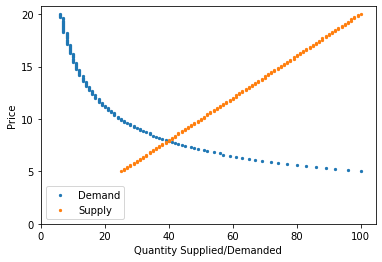

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

prices = np.linspace(5, 20, 150)
quantity_demanded = [person.consume(p) for p in prices]
quantity_supplied = [company.produce(p) for p in prices]
fig,ax = plt.subplots()

ax.scatter(quantity_demanded, prices, label="Demand", s=5)
ax.scatter(quantity_supplied, prices, label="Supply", s=5)
ax.set_xlabel("Quantity Supplied/Demanded")
ax.set_ylabel("Price")
ax.set_xticks([0,20,40,60,80,100])
ax.set_yticks([0,5,10,15,20])
ax.legend()

Does this look familiar? It should! This is just a supply and demand graph, with upward sloping supply and downward sloping demand, like you might have seen in your first ever economics course.

Looking at this graph, we can see visually where the equilibrium price would be. But we still don't have any way of finding it.

In order to tie everything together, we might want to define a new class, called an Economy. This simple economy consists of a single firm and a single, "representative" consumer. It is characterized by an equilibrium quantity $x$ and an equilibrium price $p$, along with a method to find them. In order to find the equilibrium, we look for the price at which quantity demanded is equal to quantity supplied. In this case, because the firm is constrained to produce discrete amounts, we should look for the smallest price at which the quantity supplied meets or exceeds the quantity demanded.

Here, for simplicity, we will assume that prices are set in 10 cent intervals.

In [16]:
class Economy:
    def __init__(self, consumer, firm):
        self.consumer = consumer
        self.firm = firm
        self.p = None
        self.qd = None
        self.qs = None
    
    def equilibrate(self):
        p = 0.1 # choose a small price as the starting point
        qd = self.consumer.consume(p)
        qs = self.firm.produce(p)
        while qs < qd: # check if the market has cleared
            p += 0.1 # add ten cents to the price
            qd = self.consumer.consume(p) # find quantities demanded and supplied at this new price
            qs = self.firm.produce(p)
        self.p = p
        self.qd = qd
        self.qs = qs

Now we can use our new `Economy` class to find the market clearing price in this small one-firm, one-consumer economy. The market clearing price is one where the quantity demanded is equal to the quantity sold.

In [17]:
small_economy = Economy(person, company)
small_economy.equilibrate()

print(f"In this toy economy, the market clearing price is {round(small_economy.p,2)}. At this price, {small_economy.qd} goods are demanded and {small_economy.qs} goods are supplied.")

In this toy economy, the market clearing price is 7.9. At this price, 40 goods are demanded and 40 goods are supplied.


Notice that this code is relatively slow. The reason for this is that it contains a lot of nested loops. That is, a first outer loop searches over prices, and within each price, there are two other loops that run at each iteration to find the amount demanded and supplied. Since Python loops can get pretty slow, this is definitely not the fastest way to solve this problem. However, it should give you some intuition about why these objects can be so useful. Throughout the class, we will discuss a number of ways that this code could be sped up.

In this example, we built up a simulation of an economy by describing its consituent parts, and then giving those parts intuitive rules for how they would want to interact. In this case, the model could have been solved analytically by simply taking supply equal to demand and solving for the market clearing price. However, now that we have a basic structure of the problem encoded into objects, we could make the problem a lot more complicated if we wanted, and our `Economy` object will still give us a simple way to find the solution. This type of simulation, one that uses local local heuristic to simulate the behavior of hypothetical agents, is called an **agent-based model**.

### Programming Paradigms (Optional)

Not all programming languages use objects. The paradigm of using objects to make your code more modular is called **Object-Oriented Programming (OOP)**. It's worth noting that many languages support OOP, but it is not universal. 

Here is a list of a few popular programming paradigms and the languages that are built around them:
1. **Procedural programming** (C, FORTRAN): a branch of imperative programming that attempts to make code modular by focusing directly on the sequences of steps needed to solve a problem. It emphasizes procedures, functions, and subroutines. In this paradigm, programs are organized into procedures that contain a series of instructions. Data is often shared globally, and functions manipulate this shared data.

2. **Object-oriented programming** (C++, Java): organizes procedural programs around objects that encapsulate collections of data with their behavior to increase modularity.

2. **Functional programming** (Haskell, Lisp): emphasizes computation as the evaluation of mathematical functions. It focuses on immutability, higher-order and nested functions. Unlike prodedural paradigm, functional programming attempts to avoid relying on global variables or a shared state.

3. **Generic programming** (Julia): focuses on creating reusable and type-independent code that can work with different data types. It allows for the creation of generic algorithms and data structures that can operate on multiple types without the need for explicit specialization.

This list is far from exhaustive. There are many other programming paradigms that can each give you useful ways to structure certain problems. These range from extremely general purpose paradigms like **declarative programming** (e.g. Mathematica), which constrasts to imperative and procedural programming by focusing on the declaration of the problem rather than the procedure of its solution, to highly specialized paradigms like **logical programming** (e.g. Prolog) that are designed to replicate natural language and formal logic.

In general, any problem that you can solve with one of these languages can be solved in any of the other languages (in other words, these languages are all **Turing complete**). However, different paradigms are well-suited to different problems, and some programs that are fast and easy to write in one paradigm might be extremely tedious to write in another.

Note that many languages (like Python and R) are not designed to work only within the constraints of one paradigm. This is a huge benefit to these languages. Indeed, they are specially designed to support multiple paradigms that include at least procedural, functional, and object-oriented. This is one feature that makes these languages highly versatile and useful for many types of problems.

## Exercises

### Exercise 1

Extend the `Economy` object above to take a list of consumers, rather than just one.

When calculating demand, remember that the total number purchased by Consumers should now be the sum of individual quantities demanded over all consumers in the list.

In [ ]:
class Economy:
    def __init__(self, consumer, firm):
        self.consumer = consumer
        self.firm = firm
        self.p = None
        self.qd = None
        self.qs = None
    
    def equilibrate(self): # you will need to make changes to this function to solve the problem.
        p = 0.1 # choose a small positive price as the starting point
        qd = self.consumer.consume(p)
        qs = self.firm.produce(p)
        while qs < qd: # check if the market has cleared
            p += 0.1 # add ten cents to the price
            qd = self.consumer.consume(p) # find quantities demanded and supplied at this new price
            qs = self.firm.produce(p)
        self.p = p
        self.qd = qd
        self.qs = qs

### Exercise 2

Define three `Consumers`, A, B, and C. These consumers should all have $gamma = 100$, and should have alpha parameters equal to $alpha = 0.4$, $0.5$, and $0.6$

What do you think will happen to the equilibrium price as a result of adding these two new consumers to the market? Enter your answer in the markdown cell below.

In [ ]:
# your code here

#### **Use this markdown cell to enter your answer**

### Exercise 3

Use the agent-based simulation approach to find the equilibrium prices in the new economy with three consumers, constructed in the previous exercise.

What happened to the equilibrium price and quanity? Does this agree with your answer to the previous question?

In [ ]:
# your code here

#### **Use this markdown cell to enter your answer**